In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score

# Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Dimensionality reduction (for cluster visualization)
from sklearn.decomposition import PCA

# Natural Language Processing for name classification
import re

# Warnings
import warnings
warnings.filterwarnings("ignore")
# For handling dates and time
import datetime as dt

# For exporting cleaned data
import os

# Plotly for interactive plots (optional)
import plotly.express as px

# XGBoost or CatBoost if using gradient boosting
import xgboost as xgb



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/Colab Notebooks/BUS 480_data/sold_horses.csv"

# Try with UTF-8 first, fall back to latin1 if needed
try:
    sold_horses_df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    sold_horses_df = pd.read_csv(file_path, encoding='latin1')

# Display the first few rows to check the data
sold_horses_df.head()

,Horse Name,Sire_foals,Sire_starters,Sire_winners,Sire_BW,Sire_earnings,Sire_ael,BS_foals,BS_starters,BS_winners,...,Professional,Session,Hip,PropertyLine1,Color,Sex,Sire,Dam,Purchaser,Price
0,Weekend Glory,1444.0,1033.0,746,108,"$159,483,961",2.28,3784,2656,1889,...,0.0,2,284,"Lane's End, Agent for Blue Heaven Farm",CH,Colt,Curlin,Virginia Key,Bradley Thoroughbreds LLC,1400000
1,Epic d'Oro,2601.0,1848.0,1208,184,"$210,076,772",1.74,1315,912,616,...,0.0,1,112,"Hill 'n' Dale at Xalapa, Agent",B,Colt,Medaglia d'Oro,Lotta Kim,"Epic Horses, LLC",1350000
2,Jackson Hole,698.0,413.0,272,28,"$38,226,383",1.51,2830,1786,1165,...,0.0,4,984,"Blake-Albina Thoroughbred Services LLC, Agent IV",B,Colt,Nyquist,Spa Treatment,"CHC INC., Maverick Racing & Siena Farm",1300000
3,Dionysus,698.0,413.0,272,28,"$38,226,383",1.51,1938,1173,767,...,0.0,4,1114,"Indian Creek, Agent",B,Colt,Nyquist,Candy Swap,Resolute Bloodstock,1200000
4,Elgheed,1825.0,1481.0,1090,168,"$216,460,625",2.16,795,426,274,...,0.0,1,81,"Clearsky Farms, Agent II",GR/RO,Filly,Tapit,Immediate Impact,Shadwell Farm,1200000


#Inititial dataset

In [ ]:
# Check the shape (rows, columns)
print(sold_horses_df.shape)



(6416, 37)


In [ ]:
# Check column names and data types
print(sold_horses_df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6416 entries, 0 to 6415
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Horse Name              6416 non-null   object 
 1   Sire_foals              6415 non-null   float64
 2   Sire_starters           6415 non-null   float64
 3   Sire_winners            6416 non-null   int64  
 4   Sire_BW                 6416 non-null   int64  
 5   Sire_earnings           6416 non-null   object 
 6   Sire_ael                6416 non-null   float64
 7   BS_foals                6416 non-null   int64  
 8   BS_starters             6416 non-null   int64  
 9   BS_winners              6416 non-null   int64  
 10  BS_BW                   6416 non-null   int64  
 11  BS_earnings             6416 non-null   object 
 12  BS_ael                  6416 non-null   float64
 13  Combo_foals             6416 non-null   int64  
 14  Combo_starters          6416 non-null   

In [ ]:
# Summary statistics for numerical columns
print(sold_horses_df.describe())

# Check for missing values
print(sold_horses_df.isnull().sum())

        Sire_foals  Sire_starters  Sire_winners      Sire_BW     Sire_ael  \
count  6415.000000    6415.000000   6416.000000  6416.000000  6416.000000   
mean    860.456586     596.773032    410.973192    43.812968     1.316959   
std     676.716422     542.933665    392.727524    48.839473     0.476220   
min       5.000000       0.000000      0.000000     0.000000     0.000000   
25%     364.000000     216.000000    131.000000     9.000000     1.060000   
50%     680.000000     413.000000    257.000000    27.000000     1.280000   
75%    1178.000000     847.000000    595.000000    57.000000     1.530000   
max    3921.000000    3199.000000   2297.000000   385.000000     3.060000   

          BS_foals  BS_starters   BS_winners        BS_BW       BS_ael  ...  \
count  6416.000000  6416.000000  6416.000000  6416.000000  6416.000000  ...   
mean   1933.595231  1317.617830   886.809850    73.758261     1.196827  ...   
std    1659.744088  1189.428258   807.096167    74.474561     0.26451

In [ ]:
print(sold_horses_df.columns.tolist())

['Horse Name', 'Sire_foals', 'Sire_starters', 'Sire_winners', 'Sire_BW', 'Sire_earnings', 'Sire_ael', 'BS_foals', 'BS_starters', 'BS_winners', 'BS_BW', 'BS_earnings', 'BS_ael', 'Combo_foals', 'Combo_starters', 'Combo_winners', 'Combo_BW', 'Combo_earnings', 'Combo_ael', 'Year', 'Dosage_Profile', 'Dosage_Index', 'Center_of_Distribution', 'Brilliant', 'Intermediate', 'Classic', 'Solid', 'Professional', 'Session', 'Hip', 'PropertyLine1', 'Color', 'Sex', 'Sire', 'Dam', 'Purchaser', 'Price']


##Data Cleaning

In [ ]:
# Remove any leading or trailing spaces in column names
sold_horses_df.columns = sold_horses_df.columns.str.strip()


In [ ]:
# List of columns to drop
columns_to_drop = ['Dosage_Profile', 'Dosage_Index', 'Center_of_Distribution',
                   'Brilliant', 'Intermediate', 'Classic', 'Solid', 'Professional']

# Drop only the columns that exist
existing_columns_to_drop = [col for col in columns_to_drop if col in sold_horses_df.columns]
sold_horses_df = sold_horses_df.drop(columns=existing_columns_to_drop)

# Verify the result
print(sold_horses_df.columns.tolist())

sold_horses_df.to_csv("cleaned_sold_horses.csv", index=False)


['Horse Name', 'Sire_foals', 'Sire_starters', 'Sire_winners', 'Sire_BW', 'Sire_earnings', 'Sire_ael', 'BS_foals', 'BS_starters', 'BS_winners', 'BS_BW', 'BS_earnings', 'BS_ael', 'Combo_foals', 'Combo_starters', 'Combo_winners', 'Combo_BW', 'Combo_earnings', 'Combo_ael', 'Year', 'Session', 'Hip', 'PropertyLine1', 'Color', 'Sex', 'Sire', 'Dam', 'Purchaser', 'Price']


In [ ]:
# Remove dollar signs and commas from 'Price' and convert to float
sold_horses_df['Price'] = sold_horses_df['Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)


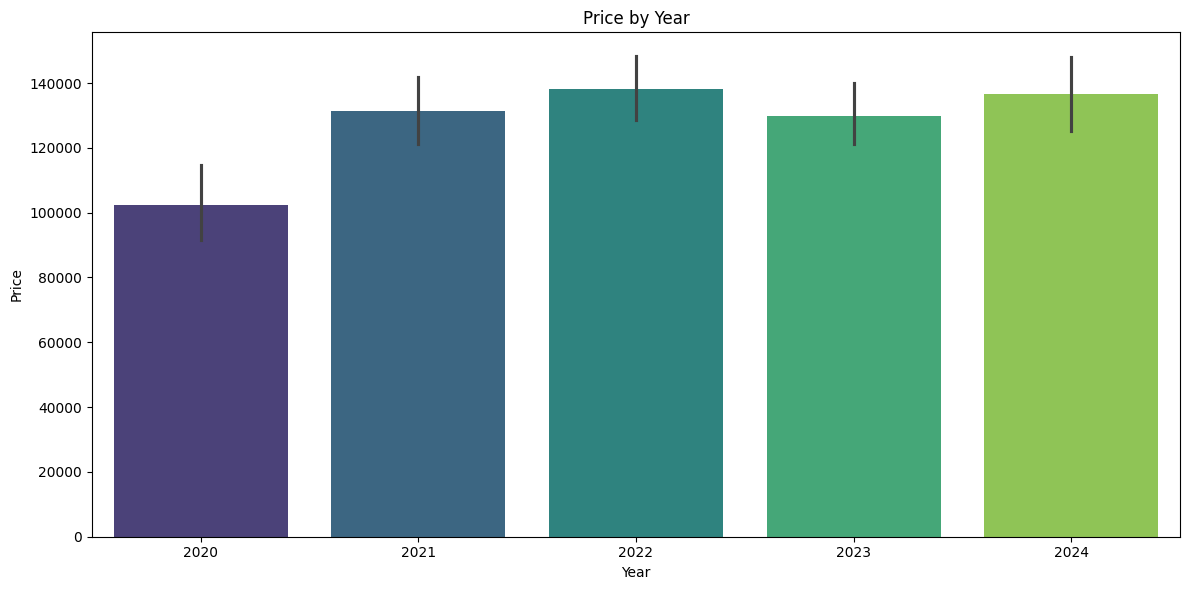

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Example: Plotting Price by Year
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Price', data=sold_horses_df, palette='viridis')
plt.title('Price by Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.tight_layout()
plt.show()



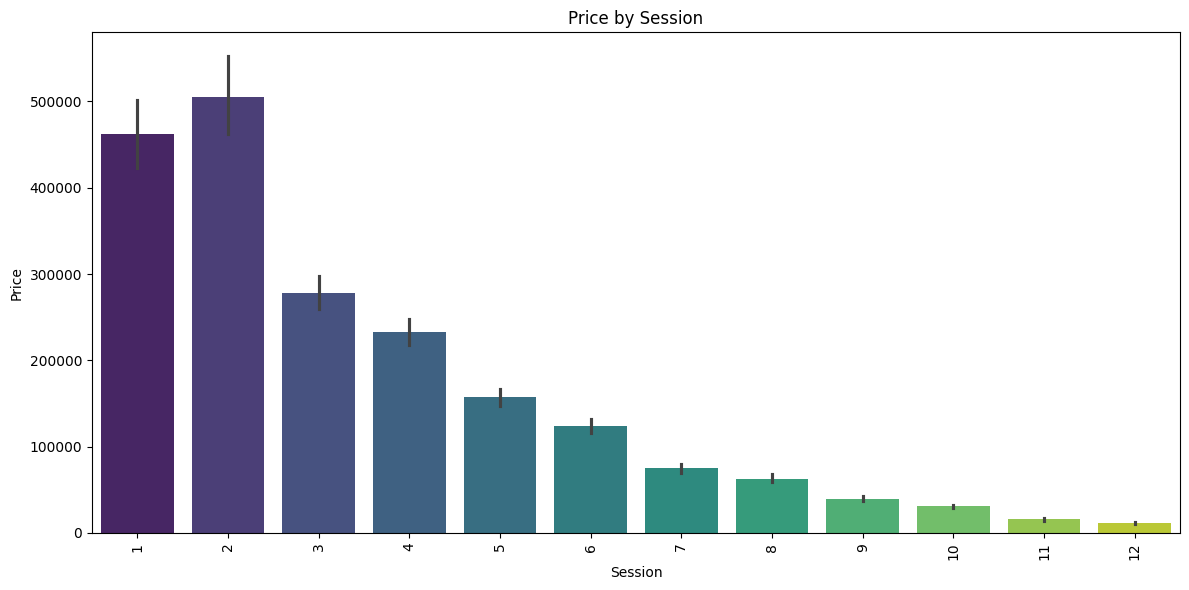

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Session', y='Price', data=sold_horses_df, palette='viridis')
plt.title('Price by Session')
plt.xlabel('Session')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x labels if needed for readability
plt.tight_layout()
plt.show()


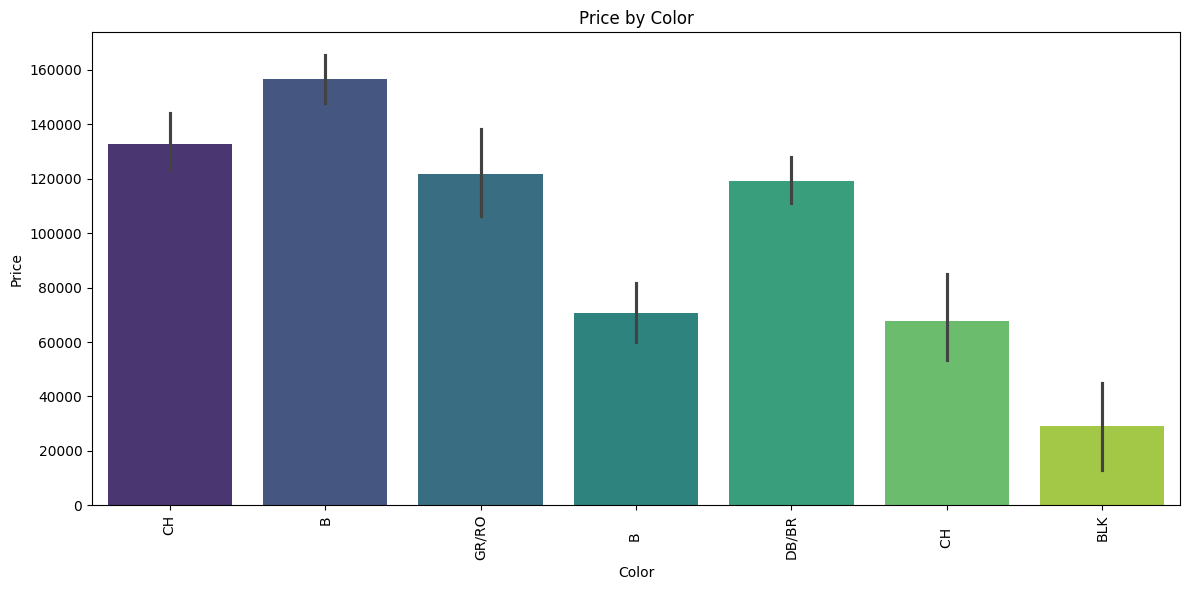

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Color', y='Price', data=sold_horses_df, palette='viridis')
plt.title('Price by Color')
plt.xlabel('Color')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x labels if needed for readability
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Define the common terms for segmentation
common_terms = [
    'Agent', 'Group', 'Farm', 'Stable', 'Stables', 'Racing', 'LLC',
    'Syndicate', 'Partnership', 'Bloodstock', 'Investments', 'Thoroughbred'
]

# Function to categorize Purchasers based on common terms
def categorize_purchaser(purchaser_name):
    for term in common_terms:
        if term.lower() in purchaser_name.lower():  # Case-insensitive check
            return term
    return 'Individual'  # For names that don't have any common terms

# Apply the function to categorize Purchasers
sold_horses_df['Buyer_Type'] = sold_horses_df['Purchaser'].apply(categorize_purchaser)

# Step 2: Check the results
buyer_type_counts = sold_horses_df['Buyer_Type'].value_counts()

# Display the count of each Buyer Type
print("Buyer Type Counts:")
print(buyer_type_counts)

# Display the first few rows of the updated dataset to ensure it's categorized correctly
print(sold_horses_df[['Purchaser', 'Buyer_Type']].head())

# Optional: Save the updated dataset with the new 'Buyer_Type' column
sold_horses_df.to_csv("buyer_segmented_sold_horses.csv", index=False)



Buyer Type Counts:
Buyer_Type
Individual      2865
Agent           1194
Stable           681
Racing           484
Farm             453
Bloodstock       266
LLC              220
Thoroughbred     187
Investments       23
Group             23
Partnership       20
Name: count, dtype: int64
                                Purchaser  Buyer_Type
0              Bradley Thoroughbreds  LLC         LLC
1                        Epic Horses, LLC         LLC
2  CHC INC., Maverick Racing & Siena Farm        Farm
3                     Resolute Bloodstock  Bloodstock
4                           Shadwell Farm        Farm


In [ ]:
# Check the original number of observations
original_shape = sold_horses_df.shape[0]


# Remaining observations after cleaning
remaining_rows = sold_horses_df.shape[0]

# Check if the Buyer_Type count matches the remaining rows
buyer_type_counts = sold_horses_df['Buyer_Type'].value_counts()

# Output the details
print(f"Original Number of Observations: {original_shape}")

print(f"Remaining Number of Observations: {remaining_rows}")
print(f"Buyer Type Counts:\n{buyer_type_counts}")

# Check if the total number of observations in Buyer_Type count equals remaining rows
print(f"Does the sum of Buyer_Type counts equal the remaining rows? {'Yes' if buyer_type_counts.sum() == remaining_rows else 'No'}")


Original Number of Observations: 6416
Remaining Number of Observations: 6416
Buyer Type Counts:
Buyer_Type
Individual      2865
Agent           1194
Stable           681
Racing           484
Farm             453
Bloodstock       266
LLC              220
Thoroughbred     187
Investments       23
Group             23
Partnership       20
Name: count, dtype: int64
Does the sum of Buyer_Type counts equal the remaining rows? Yes


In [ ]:
# Check for missing or unsegmented Buyer_Type
unsegmented_buyers = sold_horses_df[sold_horses_df['Buyer_Type'].isnull()]

# Find how many are unsegmented
num_unsegmented = unsegmented_buyers.shape[0]

# Label them as 'Individual' or 'Others' (you can modify based on your preference)
sold_horses_df.loc[sold_horses_df['Buyer_Type'].isnull(), 'Buyer_Type'] = 'Others'

# Verify the counts again after labeling
buyer_type_counts = sold_horses_df['Buyer_Type'].value_counts()

# Output the details
print(f"Number of unsegmented buyers: {num_unsegmented}")
print(f"Updated Buyer Type Counts:\n{buyer_type_counts}")


Number of unsegmented buyers: 0
Updated Buyer Type Counts:
Buyer_Type
Individual      2865
Agent           1194
Stable           681
Racing           484
Farm             453
Bloodstock       266
LLC              220
Thoroughbred     187
Investments       23
Group             23
Partnership       20
Name: count, dtype: int64


^^THIS APPROACH ISNT WORKING CAUSE IT IS NOT SEGMENTING THE INDIVIDUAL BUYERS WITH NAMES LIKE "JOHN","CHARLIE",...

REDOING THEM AND SEGMENTING THEM AS CORPORATE AND INVIDUAL FIRST

In [ ]:
# Define a list of keywords for corporate/group identification
corporate_keywords = ['Agent', 'Group', 'Farm', 'Stable', 'Stables', 'Racing', 'LLC', 'Syndicate', 'Partnership', 'Bloodstock', 'Investments', 'Thoroughbred']

# Function to identify individual buyers by excluding corporate keywords
def identify_individual(purchaser_name):
    if any(keyword in purchaser_name for keyword in corporate_keywords):
        return 'Corporate'
    else:
        return 'Individual'

# Apply the function to create a new 'Buyer_Type' column
sold_horses_df['Buyer_Type'] = sold_horses_df['Purchaser'].apply(identify_individual)

# Verify the updated counts
buyer_type_counts = sold_horses_df['Buyer_Type'].value_counts()

# Output the updated Buyer Type counts
print(f"Updated Buyer Type Counts:\n{buyer_type_counts}")


Updated Buyer Type Counts:
Buyer_Type
Corporate     3548
Individual    2868
Name: count, dtype: int64


In [ ]:
import re

# Function to segment based on substrings found in the Purchaser's name
def segment_buyer_by_name(purchaser):
    # Lowercase the purchaser name for consistency
    purchaser = purchaser.lower()

    # Define the keyword categories for segmentation
    if re.search(r'agent', purchaser):
        return 'Agent'
    elif re.search(r'bloodstock', purchaser):
        return 'Bloodstock'
    elif re.search(r'farm', purchaser):
        return 'Farm'
    elif re.search(r'stable', purchaser):
        return 'Stable'
    elif re.search(r'syndicate', purchaser):
        return 'Syndicate'
    elif re.search(r'llc', purchaser):
        return 'LLC'
    elif re.search(r'racing', purchaser):
        return 'Racing'
    elif re.search(r'group', purchaser):
        return 'Group'
    elif re.search(r'partnership', purchaser):
        return 'Partnership'
    elif re.search(r'investments', purchaser):
        return 'Investments'
    elif re.search(r'thoroughbred', purchaser):
        return 'Thoroughbred'
    else:
        return 'Individual'  # Default if no keywords match

# Apply segmentation logic to the Purchaser column
sold_horses_df['Buyer_Type'] = sold_horses_df['Purchaser'].apply(segment_buyer_by_name)

# Check the updated Buyer Type counts
buyer_type_counts = sold_horses_df['Buyer_Type'].value_counts()

# Display the result
print(buyer_type_counts)

# You can also print the first few rows to see how it's working
print(sold_horses_df[['Purchaser', 'Buyer_Type']].head())


Buyer_Type
Individual      2865
Agent           1194
Stable           678
Farm             450
Racing           379
LLC              314
Bloodstock       288
Thoroughbred     187
Investments       23
Partnership       20
Group             18
Name: count, dtype: int64
                                Purchaser  Buyer_Type
0              Bradley Thoroughbreds  LLC         LLC
1                        Epic Horses, LLC         LLC
2  CHC INC., Maverick Racing & Siena Farm        Farm
3                     Resolute Bloodstock  Bloodstock
4                           Shadwell Farm        Farm


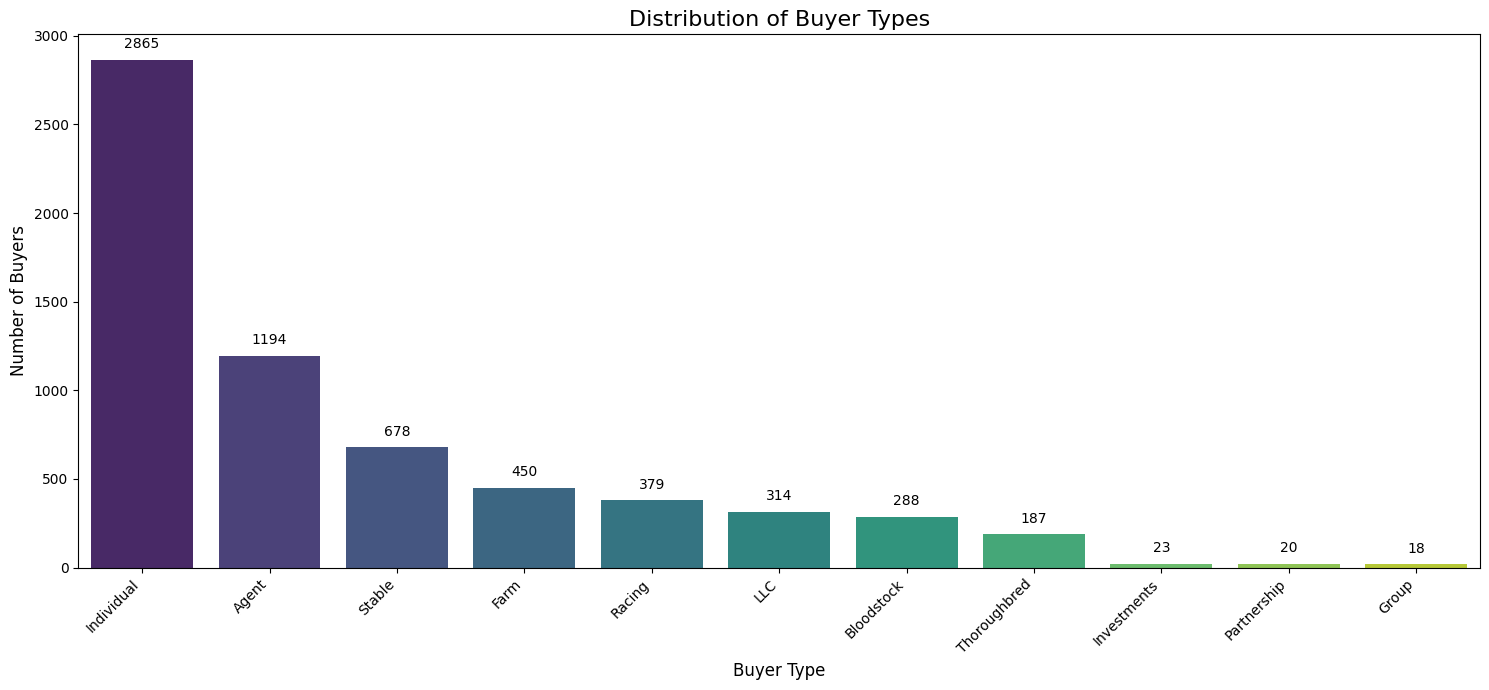

In [ ]:
# Create a larger plot size and adjust the labels
plt.figure(figsize=(15, 7))  # Make the plot larger

# Convert buyer_type_counts to DataFrame
buyer_type_counts = buyer_type_counts.reset_index(name='count')


# Create the bar plot
sns.barplot(x='Buyer_Type', y='count', data=buyer_type_counts, palette='viridis')

# Add the values on top of the bars
for i, value in enumerate(buyer_type_counts['count']):
    plt.text(i, value + 50, f'{value:.0f}', ha='center', va='bottom', fontsize=10)

# Title and labels
plt.title("Distribution of Buyer Types", fontsize=16)
plt.xlabel("Buyer Type", fontsize=12)
plt.ylabel("Number of Buyers", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Make sure everything fits
plt.show()

1. Segment Analysis on Spending Patterns
Missing: While you've segmented the buyers into categories, a deeper analysis is required on their spending patterns. For each segment, calculate key metrics such as:

Total spending per segment

Average spending per transaction

Frequency of purchases per segment.

This will help you understand how different segments behave in terms of spending, which is essential for making data-driven business recommendations.

2. Comparing Segment Performance
Missing: You should compare segment performance by calculating metrics such as:

Customer Lifetime Value (CLV) or average purchase frequency per segment.

Growth potential (Is there any segment that shows an increasing trend in spending or frequency of purchases?).

This type of analysis will help in targeting the high-value and low-value customers more effectively.

3. Key Business Recommendations
Missing: Once the spending patterns and segment performance are fully analyzed, business strategies or recommendations should be made for each segment. These could include:

Targeted marketing strategies for high-value customers like Agent or LLC.

Promotions or education strategies for low-value customers like Partnership or Investments.

Up-sell or cross-sell opportunities based on segment behavior.

4. Refining Segment Names for Clarity
Missing: While the segmentation is correct, consider reviewing the clarity of segment names. For instance:

Syndicates and Racing could be confusing—should you combine these into one category (e.g., Racing Syndicates)?

Similarly, Farm and Bloodstock could overlap. Clarifying the overlap could refine your segmentation.

5. Incorporating Historical Buyer Data
Missing: If historical buyer behavior is available (like how much they spent in previous years or trends over time), incorporate this to identify trends within each segment. This allows you to predict future behavior and enhance segmentation accuracy.

6. Clustering or Advanced Segmentation
Optional: For a more advanced approach, consider using machine learning models (like KMeans or decision trees) to refine your segmentation, ensuring the groups are as distinct as possible.

This might help you see if any sub-segments exist within categories like Agent or Farm that are worth isolating.

7. Data Completeness Check
Needed: Although you've handled missing data, ensure that the final dataset is clean and complete. Any missing or inconsistent data in key columns (like Price, Purchaser, etc.) should be addressed before proceeding to analysis.

8. Customer Segmentation vs. Product Segmentation
Missing/Needed: It might also be useful to look at product segmentation—for instance, what type of horses are the different buyer types purchasing most often (e.g., yearlings vs. older horses, pedigree type)?

This can help you make cross-selling or up-selling recommendations based on buyer behavior.

9. Exploring Behavioral Factors
Missing: If possible, analyze behavioral data related to the buyers’ actions, such as:

Which buyers tend to make larger purchases during certain auctions or seasons?

Do buyers in specific segments prefer certain types of auctions (online vs. in-person)?



#1. Segment Analysis on Spending Patterns

In [ ]:
# Segment Analysis: Spending Patterns
segment_spending_analysis = sold_horses_df.groupby('Buyer_Type').agg(
    total_spending=('Price', 'sum'),
    avg_spending_per_transaction=('Price', 'mean'),
    purchase_frequency=('Purchaser', 'nunique')
).reset_index()

# Display the results
print(segment_spending_analysis)


      Buyer_Type  total_spending  avg_spending_per_transaction  \
0          Agent     181946900.0                 152384.338358   
1     Bloodstock      30218000.0                 104923.611111   
2           Farm      91087200.0                 202416.000000   
3          Group       4662000.0                 259000.000000   
4     Individual     279340700.0                  97501.116928   
5    Investments       1996000.0                  86782.608696   
6            LLC      45407200.0                 144608.917197   
7    Partnership        519000.0                  25950.000000   
8         Racing      62546200.0                 165029.551451   
9         Stable      96916700.0                 142944.985251   
10  Thoroughbred      34562700.0                 184827.272727   

    purchase_frequency  
0                  469  
1                  142  
2                  163  
3                    7  
4                 1271  
5                   11  
6                  155  
7      

#2. Comparing Segment Performance
For comparing segment performance:
-Calculate Customer Lifetime Value (CLV) (average spending * purchase frequency).

In [ ]:
print(sold_horses_df.columns)


Index(['Horse Name', 'Sire_foals', 'Sire_starters', 'Sire_winners', 'Sire_BW',
       'Sire_earnings', 'Sire_ael', 'BS_foals', 'BS_starters', 'BS_winners',
       'BS_BW', 'BS_earnings', 'BS_ael', 'Combo_foals', 'Combo_starters',
       'Combo_winners', 'Combo_BW', 'Combo_earnings', 'Combo_ael', 'Year',
       'Session', 'Hip', 'PropertyLine1', 'Color', 'Sex', 'Sire', 'Dam',
       'Purchaser', 'Price', 'Buyer_Type'],
      dtype='object')


In [ ]:
sold_horses_df.columns = sold_horses_df.columns.str.strip().str.lower()  # Standardize column names
print(sold_horses_df.columns)


Index(['horse name', 'sire_foals', 'sire_starters', 'sire_winners', 'sire_bw',
       'sire_earnings', 'sire_ael', 'bs_foals', 'bs_starters', 'bs_winners',
       'bs_bw', 'bs_earnings', 'bs_ael', 'combo_foals', 'combo_starters',
       'combo_winners', 'combo_bw', 'combo_earnings', 'combo_ael', 'year',
       'session', 'hip', 'propertyline1', 'color', 'sex', 'sire', 'dam',
       'purchaser', 'price', 'buyer_type'],
      dtype='object')


In [ ]:
# Ensure necessary columns are correctly defined before aggregation
sold_horses_df['Total_Spending'] = sold_horses_df.groupby('purchaser')['price'].transform('sum')
sold_horses_df['Avg_Horse_Price'] = sold_horses_df.groupby('purchaser')['price'].transform('mean')
sold_horses_df['Purchase_Frequency'] = sold_horses_df.groupby('purchaser')['session'].transform('nunique')

# Now we can safely group by Buyer_Type and calculate the required metrics
segment_performance = sold_horses_df.groupby('buyer_type').agg(
    total_spend=('Total_Spending', 'sum'),
    avg_spend_per_purchase=('Avg_Horse_Price', 'mean'),
    avg_purchase_frequency=('Purchase_Frequency', 'mean'),
    num_buyers=('purchaser', 'nunique')
).reset_index()

# Format the 'total_spend', 'avg_spend_per_purchase', and 'avg_purchase_frequency' columns for better readability with 2 decimals
segment_performance['total_spend'] = segment_performance['total_spend'].apply(lambda x: f'{x:,.2f}')  # 2 decimals and commas for thousands
segment_performance['avg_spend_per_purchase'] = segment_performance['avg_spend_per_purchase'].apply(lambda x: f'{x:,.2f}')  # 2 decimals for average spending
segment_performance['avg_purchase_frequency'] = segment_performance['avg_purchase_frequency'].apply(lambda x: f'{x:.2f}')  # 2 decimals for frequency
segment_performance['CLV'] = (segment_performance['total_spend'].apply(lambda x: float(x.replace(",", ""))) * segment_performance['avg_purchase_frequency'].astype(float)).apply(lambda x: f'{x:,.2f}')  # CLV with 2 decimals

# Display the results with formatted CLV, total spend, and avg_purchase_frequency
print(segment_performance)


      buyer_type       total_spend avg_spend_per_purchase  \
0          Agent  2,653,297,200.00             152,384.34   
1     Bloodstock     98,989,500.00             104,923.61   
2           Farm    767,145,400.00             202,416.00   
3          Group     23,959,000.00             259,000.00   
4     Individual  1,885,179,100.00              97,501.12   
5    Investments      5,157,000.00              86,782.61   
6            LLC    205,874,200.00             144,608.92   
7    Partnership      1,905,000.00              25,950.00   
8         Racing    198,487,200.00             165,029.55   
9         Stable    831,240,900.00             142,944.99   
10  Thoroughbred    314,426,100.00             184,827.27   

   avg_purchase_frequency  num_buyers                CLV  
0                    3.89         469  10,321,326,108.00  
1                    2.88         142     285,089,760.00  
2                    3.69         163   2,830,766,526.00  
3                    3.06      

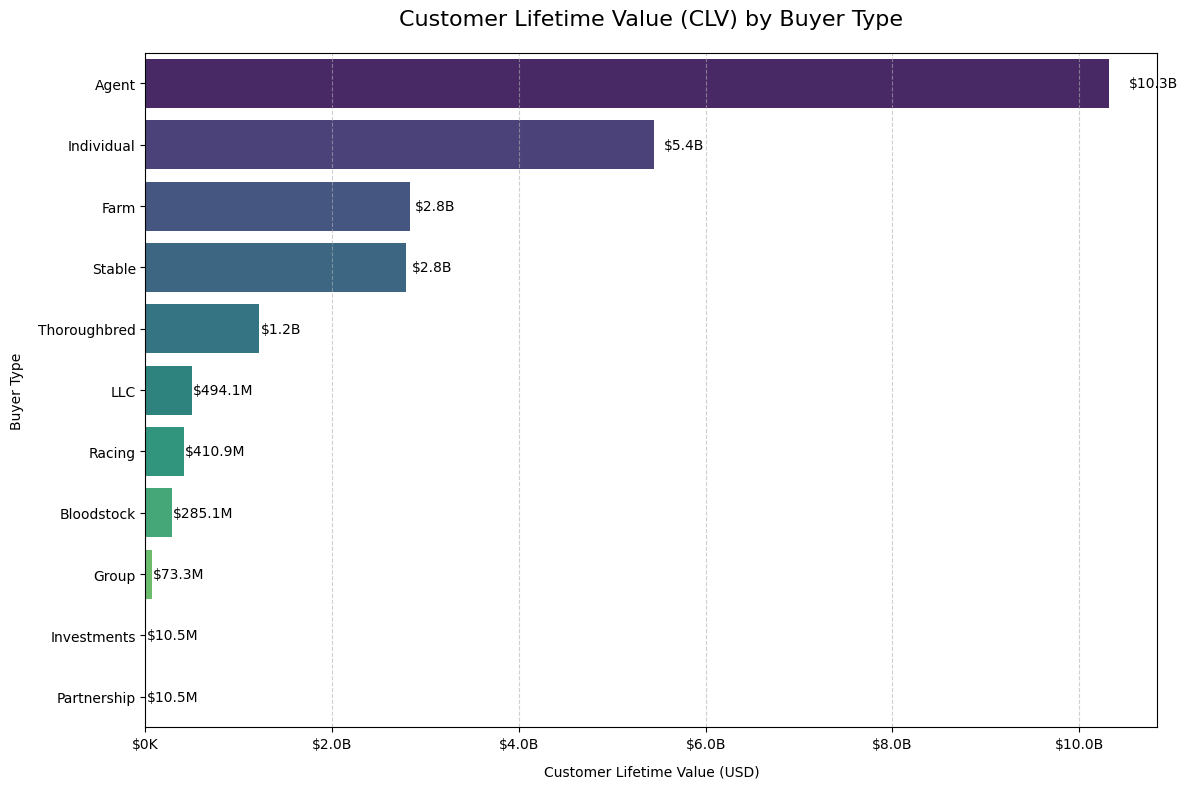

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert CLV to numeric (remove commas and convert to float)
segment_performance['CLV_numeric'] = segment_performance['CLV'].str.replace(',', '').astype(float)

# Sort by CLV for better visualization
segment_performance_sorted = segment_performance.sort_values('CLV_numeric', ascending=False)

# Create the plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='CLV_numeric',
    y='buyer_type',
    data=segment_performance_sorted,
    palette='viridis',
    orient='h'  # Horizontal bars
)

# Format x-axis as dollars with proper scaling
def currency_formatter(x, pos):
    if x >= 1e9:
        return f'${x/1e9:.1f}B'
    elif x >= 1e6:
        return f'${x/1e6:.1f}M'
    else:
        return f'${x/1e3:.0f}K'

ax.xaxis.set_major_formatter(plt.FuncFormatter(currency_formatter))

# Add value labels to bars
for p in ax.patches:
    width = p.get_width()
    ax.text(width * 1.02, p.get_y() + p.get_height()/2.,
            f'{currency_formatter(width, None)}',
            ha='left', va='center')

# Styling
plt.title('Customer Lifetime Value (CLV) by Buyer Type', pad=20, fontsize=16)
plt.xlabel('Customer Lifetime Value (USD)', labelpad=10)
plt.ylabel('Buyer Type', labelpad=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

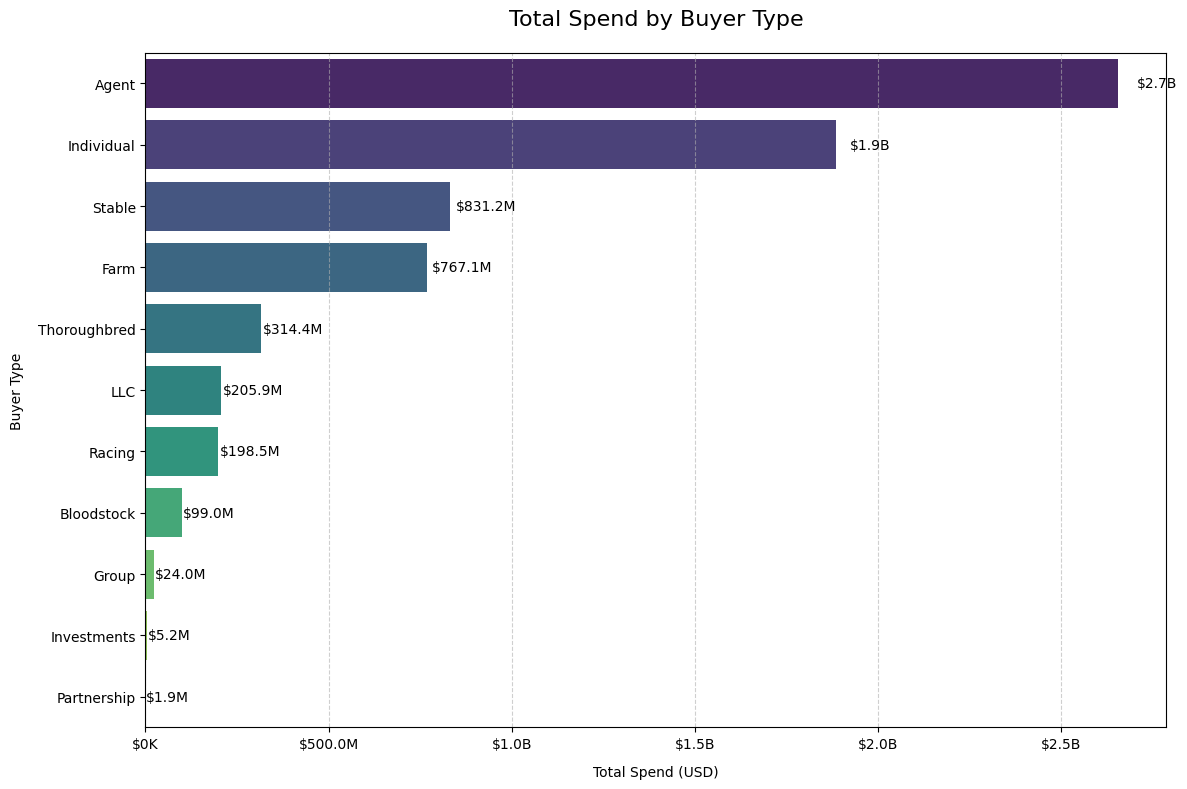

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert total_spend to numeric (remove commas and convert to float)
segment_performance['total_spend_numeric'] = segment_performance['total_spend'].str.replace(',', '').astype(float)

# Sort by total spend for better visualization
segment_performance_sorted = segment_performance.sort_values('total_spend_numeric', ascending=False)

# Create horizontal bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='total_spend_numeric',
    y='buyer_type',
    data=segment_performance_sorted,
    palette='viridis',
    orient='h'
)

# Custom dollar formatter
def currency_formatter(x, pos):
    if x >= 1e9:
        return f'${x/1e9:.1f}B'
    elif x >= 1e6:
        return f'${x/1e6:.1f}M'
    else:
        return f'${x/1e3:.0f}K'

ax.xaxis.set_major_formatter(plt.FuncFormatter(currency_formatter))

# Add value labels to bars
for p in ax.patches:
    width = p.get_width()
    ax.text(width * 1.02, p.get_y() + p.get_height()/2.,
            f'{currency_formatter(width, None)}',
            ha='left', va='center')

# Styling
plt.title('Total Spend by Buyer Type', pad=20, fontsize=16)
plt.xlabel('Total Spend (USD)', labelpad=10)
plt.ylabel('Buyer Type', labelpad=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

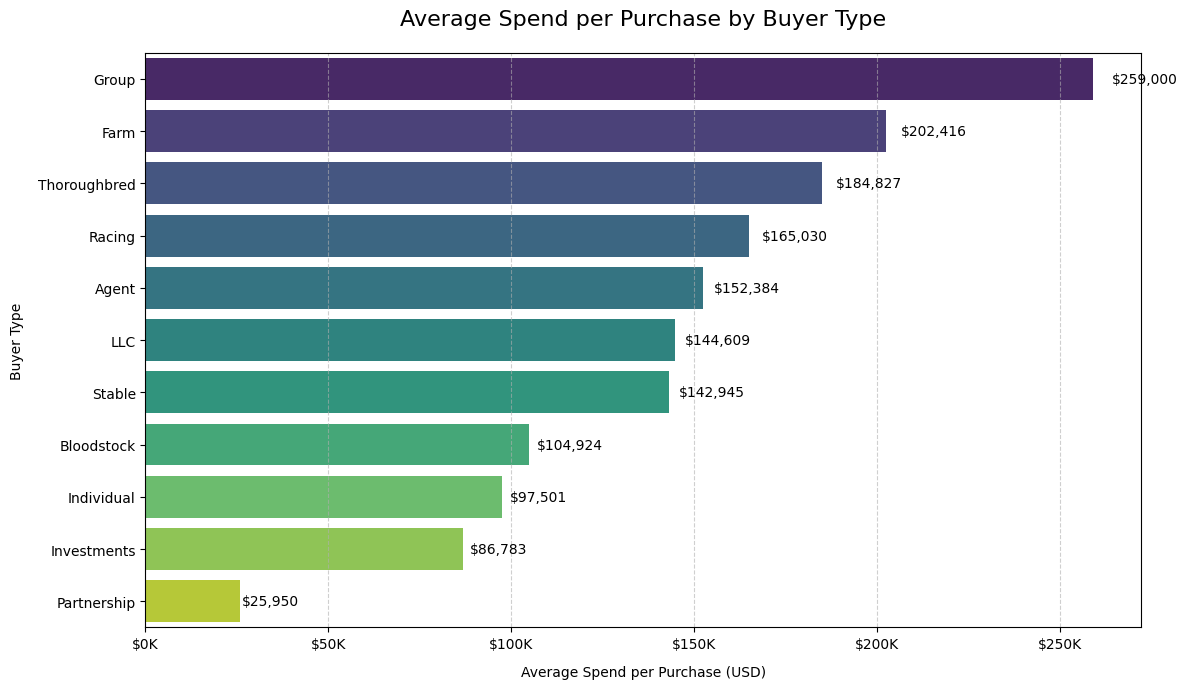

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert avg_spend_per_purchase to numeric (remove commas and convert to float)
segment_performance['avg_spend_numeric'] = segment_performance['avg_spend_per_purchase'].str.replace(',', '').astype(float)

# Sort by average spend for better visualization
segment_performance_sorted = segment_performance.sort_values('avg_spend_numeric', ascending=False)

# Create horizontal bar plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x='avg_spend_numeric',
    y='buyer_type',
    data=segment_performance_sorted,
    palette='viridis',
    orient='h'
)

# Custom dollar formatter (simplified for this scale)
def currency_formatter(x, pos):
    if x >= 1e6:
        return f'${x/1e6:.1f}M'
    else:
        return f'${x/1e3:.0f}K'

ax.xaxis.set_major_formatter(plt.FuncFormatter(currency_formatter))

# Add value labels to bars
for p in ax.patches:
    width = p.get_width()
    ax.text(width * 1.02, p.get_y() + p.get_height()/2.,
            f'${width:,.0f}',  # Shows exact dollar amount
            ha='left', va='center')

# Styling
plt.title('Average Spend per Purchase by Buyer Type', pad=20, fontsize=16)
plt.xlabel('Average Spend per Purchase (USD)', labelpad=10)
plt.ylabel('Buyer Type', labelpad=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


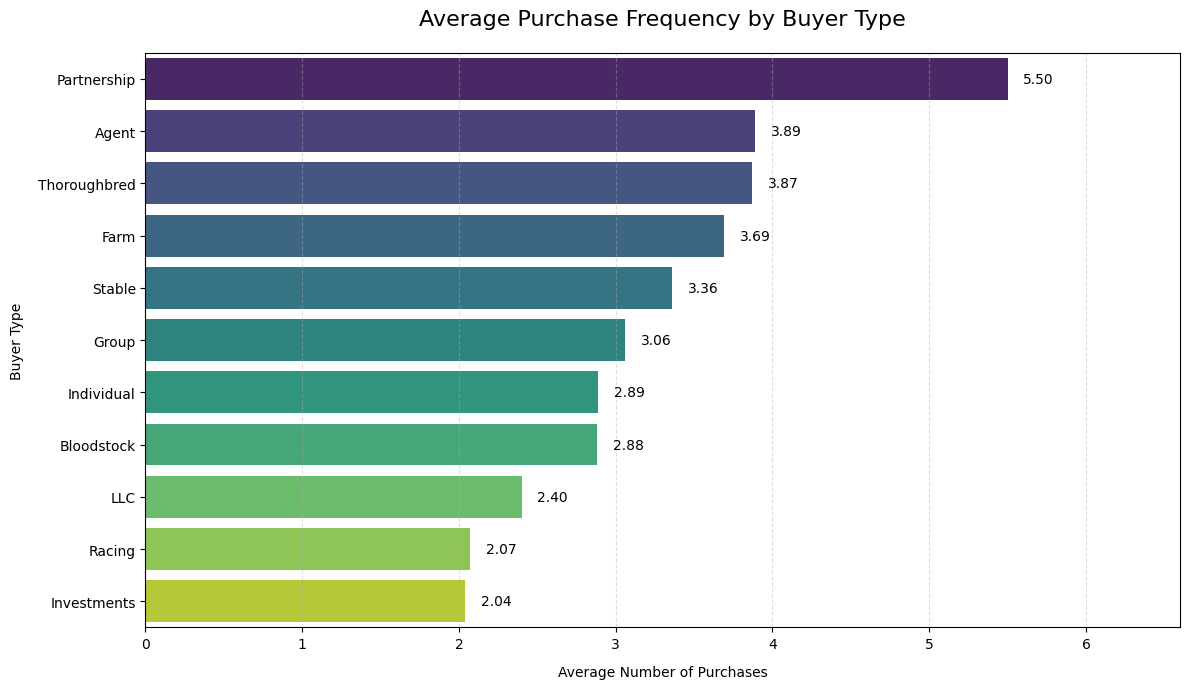

In [ ]:
# Convert 'avg_purchase_frequency' to numeric for plotting
segment_performance['avg_freq_numeric'] = segment_performance['avg_purchase_frequency'].astype(float)

# Sort by frequency for better visualization
segment_performance_sorted = segment_performance.sort_values('avg_freq_numeric', ascending=False)

# Create horizontal bar plot for Average Purchase Frequency by Buyer Type
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x='avg_freq_numeric',
    y='buyer_type',
    data=segment_performance_sorted,
    palette='viridis',  # Uniform color palette
    orient='h'
)

# Add value labels to bars
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.1,  # Slight offset from bar end
            p.get_y() + p.get_height()/2.,
            f'{width:.2f}',  # Shows exact frequency value
            ha='left',
            va='center',
            fontsize=10)

# Styling
plt.title('Average Purchase Frequency by Buyer Type', pad=20, fontsize=16)
plt.xlabel('Average Number of Purchases', labelpad=10)
plt.ylabel('Buyer Type', labelpad=10)
plt.xlim(0, segment_performance['avg_freq_numeric'].max() * 1.2)  # Add padding
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


##Observations on the Chart:
High-Value Segments (in terms of CLV):

Agent (CLV = $10.32B), Individual (CLV = $5.44B), Farm (CLV = $2.83B), and Stable (CLV = $2.79B) remain strong contributors to total value. These segments are clearly essential for targeting.

Low-Value Segments:

Partnership (CLV = $10.48M) and Investments (CLV = $10.53M) continue to have low CLV, confirming they don't drive much revenue. However, Partnership has a slightly higher average purchase frequency (5.50) than Investments (2.04), which means it's more engaged and should be targeted with promotions.

Loyalty vs. Spending:

Racing (CLV = $410.9M) and LLC (CLV = $494.1M) still exhibit decent CLV despite moderate average spending. Their relatively high purchase frequency suggests they are loyal customers but spend less per purchase.

##Strategic Recommendations Based on Updated Insights:
Elite Targeting:

Agent ($10.32B), Individual ($5.44B), and Farm ($2.83B) are the most significant segments by CLV. These high-value segments should be the focus for exclusive offerings, loyalty rewards, and targeted marketing.

Promotions for Low-Value Segments:

Partnership ($10.48M) and Investments ($10.53M) remain the least valuable, so you should consider promotional campaigns for these segments. However, since Partnership has a higher purchase frequency (5.5) than Investments (2.04), the former might be more receptive to offers designed to boost loyalty and spending.

Cross-Sell and Up-Sell:

Individual buyers ($5.44B in CLV) have a moderate CLV but represent a large portion of the buyer base. This makes them a prime target for cross-sell and up-sell strategies—offering them higher-value purchases or exclusive access to premium lots.

Adjustments to Key Insights & Recommendations:
Total Spend and CLV: The CLV values for Agent, Individual, and Farm are significantly higher compared to others. So, even if the average purchase frequency for Individual buyers is moderate (2.89), they still contribute heavily to revenue due to their frequency of purchases.

Loyalty Segments: Racing and LLC have strong CLV values and high purchase frequencies. This suggests these are loyal customers who could be engaged with targeted, high-reward promotions or exclusive offers.



#Percentage Contribution to Total Spend

In [ ]:
# Calculate percentage contribution to total spend
segment_performance['total_spend'] = segment_performance['total_spend'].apply(lambda x: float(x.replace(",", "")))
total_spending = segment_performance['total_spend'].sum()

segment_performance['percentage_contribution'] = (segment_performance['total_spend'] / total_spending) * 100

# Display the results with percentage
segment_performance['percentage_contribution'] = segment_performance['percentage_contribution'].apply(lambda x: f'{x:.2f}%')

print(segment_performance)


      buyer_type   total_spend avg_spend_per_purchase avg_purchase_frequency  \
0          Agent  2.653297e+09             152,384.34                   3.89   
1     Bloodstock  9.898950e+07             104,923.61                   2.88   
2           Farm  7.671454e+08             202,416.00                   3.69   
3          Group  2.395900e+07             259,000.00                   3.06   
4     Individual  1.885179e+09              97,501.12                   2.89   
5    Investments  5.157000e+06              86,782.61                   2.04   
6            LLC  2.058742e+08             144,608.92                   2.40   
7    Partnership  1.905000e+06              25,950.00                   5.50   
8         Racing  1.984872e+08             165,029.55                   2.07   
9         Stable  8.312409e+08             142,944.99                   3.36   
10  Thoroughbred  3.144261e+08             184,827.27                   3.87   

    num_buyers                CLV   CLV

##Creating Ranges Based on CLV
You can segment CLV into different ranges to show how buyers' potential contributions differ. For instance, you could categorize buyers into:

High-Value Buyers: CLV > $1M

Medium-Value Buyers: CLV between $100K - $1M

Low-Value Buyers: CLV < $100K

In [ ]:
# First, ensure we're working with clean numeric values
try:
    # Try converting directly if CLV exists
    if 'CLV' in segment_performance.columns:
        segment_performance['CLV_numeric'] = (
            segment_performance['CLV']
            .astype(str)  # Convert to string first to handle any type
            .str.replace('[^\d.]', '', regex=True)  # Remove all non-numeric characters
            .replace('', '0')  # Handle empty strings
            .astype(float)  # Convert to float
        )
    else:
        # If CLV doesn't exist but we have the components to calculate it
        if all(col in segment_performance.columns for col in ['total_spend', 'avg_purchase_frequency']):
            segment_performance['CLV_numeric'] = (
                segment_performance['total_spend'].str.replace(',', '').astype(float) *
                segment_performance['avg_purchase_frequency'].astype(float)
            )
        else:
            raise KeyError("Neither CLV nor its components found in dataframe")

    # Now apply categorization
    def categorize_clv(clv):
        if clv >= 1e9:  # $1 billion+
            return "Ultra High-Value"
        elif 1e8 <= clv < 1e9:  # $100M-$999M
            return "High-Value"
        elif 1e7 <= clv < 1e8:  # $10M-$99M
            return "Medium-Value"
        else:  # Under $10M
            return "Low-Value"

    segment_performance['CLV_category'] = segment_performance['CLV_numeric'].apply(categorize_clv)

    # Display results
    print("CLV Categorization Results:")
    print(segment_performance[['buyer_type', 'CLV_numeric', 'CLV_category']]
          .sort_values('CLV_numeric', ascending=False)
          .rename(columns={'CLV_numeric': 'CLV (USD)'}))

    # Format the numeric display
    pd.options.display.float_format = '${:,.2f}'.format

except Exception as e:
    print(f"Error processing CLV data: {str(e)}")
    print("\nAvailable columns in segment_performance:")
    print(segment_performance.columns.tolist())

CLV Categorization Results:
      buyer_type     CLV (USD)      CLV_category
0          Agent  1.032133e+10  Ultra High-Value
4     Individual  5.448168e+09  Ultra High-Value
2           Farm  2.830767e+09  Ultra High-Value
9         Stable  2.792969e+09  Ultra High-Value
10  Thoroughbred  1.216829e+09  Ultra High-Value
6            LLC  4.940981e+08        High-Value
8         Racing  4.108685e+08        High-Value
1     Bloodstock  2.850898e+08        High-Value
3          Group  7.331454e+07      Medium-Value
5    Investments  1.052028e+07      Medium-Value
7    Partnership  1.047750e+07      Medium-Value


#1. Ensure Data Formatting


In [ ]:
# Check column names to verify 'avg_purchase_frequency' exists
print(sold_horses_df.columns)

# If 'avg_purchase_frequency' doesn't exist, create it
if 'avg_purchase_frequency' not in sold_horses_df.columns:
    sold_horses_df['avg_purchase_frequency'] = sold_horses_df.groupby('purchaser')['session'].transform('nunique')

# Ensure 'Total_Spending' and 'avg_purchase_frequency' are numeric types
sold_horses_df['Total_Spending'] = pd.to_numeric(sold_horses_df['Total_Spending'], errors='coerce')
sold_horses_df['avg_purchase_frequency'] = pd.to_numeric(sold_horses_df['avg_purchase_frequency'], errors='coerce')

# Replace NaN values with 0
sold_horses_df['Total_Spending'].fillna(0, inplace=True)
sold_horses_df['avg_purchase_frequency'].fillna(0, inplace=True)


Index(['horse name', 'sire_foals', 'sire_starters', 'sire_winners', 'sire_bw',
       'sire_earnings', 'sire_ael', 'bs_foals', 'bs_starters', 'bs_winners',
       'bs_bw', 'bs_earnings', 'bs_ael', 'combo_foals', 'combo_starters',
       'combo_winners', 'combo_bw', 'combo_earnings', 'combo_ael', 'year',
       'session', 'hip', 'propertyline1', 'color', 'sex', 'sire', 'dam',
       'purchaser', 'price', 'buyer_type', 'Total_Spending', 'Avg_Horse_Price',
       'Purchase_Frequency'],
      dtype='object')


#Error Handling
**Goal**: Add robust error handling in your code to ensure smooth operation, especially in case columns are missing, or data is incorrectly formatted.

**Action**: Always check that necessary columns exist before performing calculations. If missing, log an error or handle it gracefully by creating the required columns.

In [ ]:
# Ensure required columns exist before performing operations
required_columns = ['Total_Spending', 'avg_purchase_frequency']
missing_columns = [col for col in required_columns if col not in sold_horses_df.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Proceed with calculations
    sold_horses_df['Total_Spending'] = pd.to_numeric(sold_horses_df['Total_Spending'], errors='coerce')
    sold_horses_df['avg_purchase_frequency'] = pd.to_numeric(sold_horses_df['avg_purchase_frequency'], errors='coerce')

    # Replace NaN values with 0
    sold_horses_df['Total_Spending'].fillna(0, inplace=True)
    sold_horses_df['avg_purchase_frequency'].fillna(0, inplace=True)


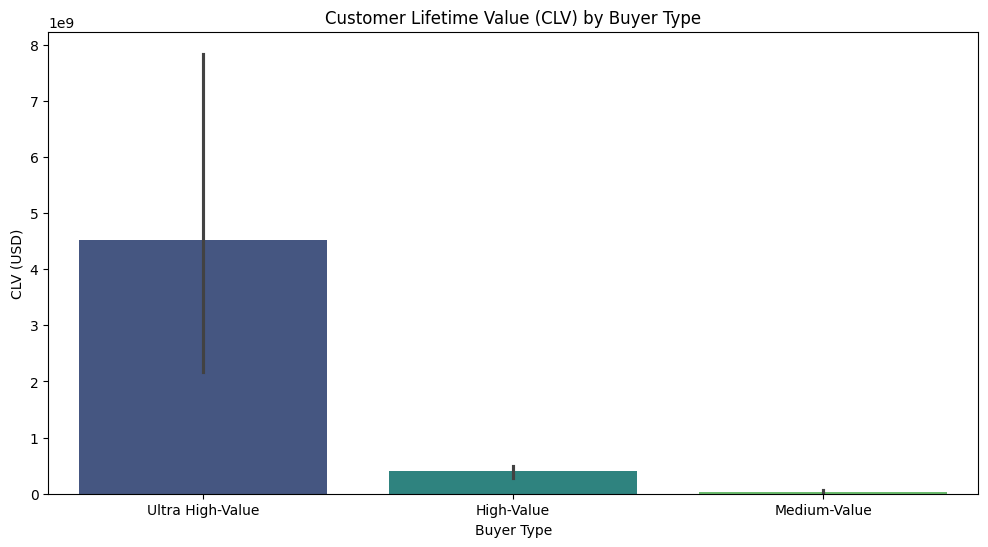

In [ ]:
# Bar plot for CLV by Buyer Type
plt.figure(figsize=(12, 6))
sns.barplot(x='CLV_category', y='CLV_numeric', data=segment_performance, palette='viridis')
plt.title('Customer Lifetime Value (CLV) by Buyer Type')
plt.xlabel('Buyer Type')
plt.ylabel('CLV (USD)')
plt.show()


## APPROACH TWO

##  Dynamic Segmentation:
**Goal**: Experiment with dynamic segmentation where buyers could move between categories as their behavior evolves over time.
**Action**: Implement tracking mechanisms that can observe buyer behavior over time and trigger re-segmentation when needed (e.g., if a buyer moves from a Medium-Value to a High-Value category due to increased purchases).

In [ ]:
# Example: Move customers to higher-value categories based on increased spending
sold_horses_df['CLV_category'] = sold_horses_df['Total_Spending'].apply(
    lambda x: 'High-Value Buyer' if x > 1000000 else 'Medium-Value Buyer' if x > 100000 else 'Low-Value Buyer'
)


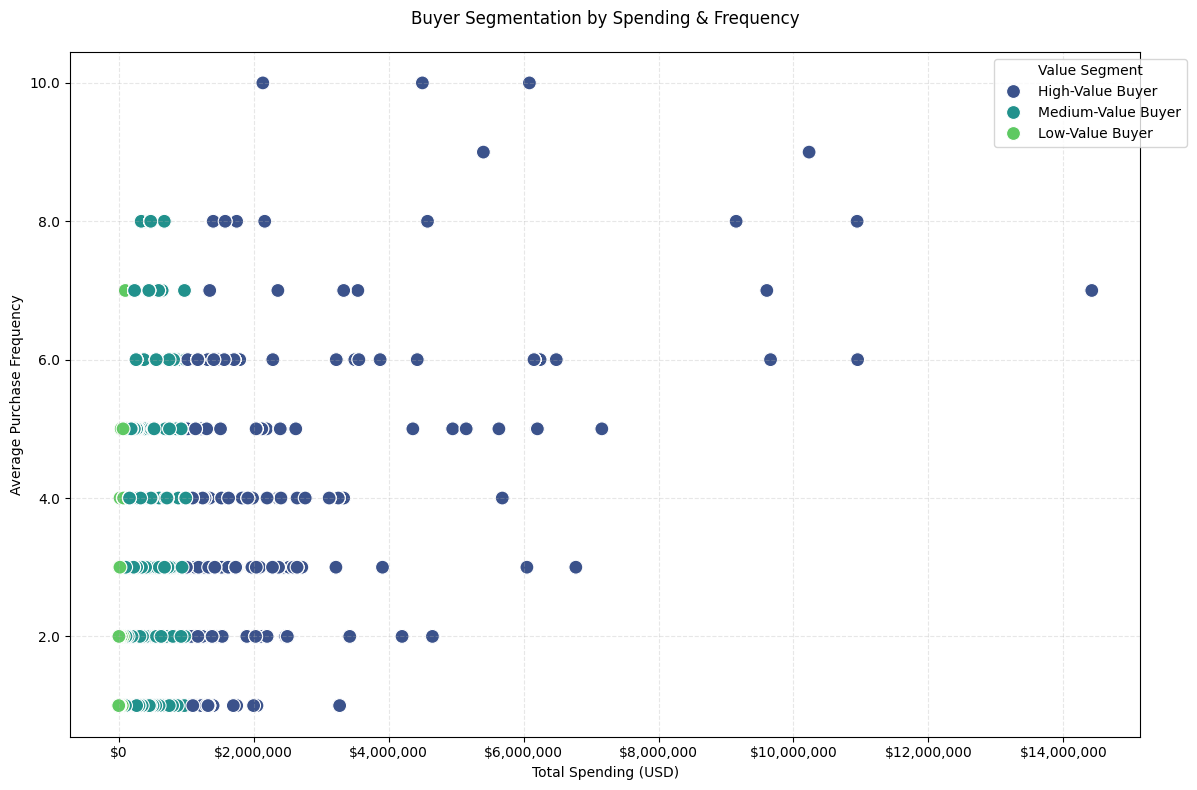

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker  # Required for formatting

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x='Total_Spending',
    y='avg_purchase_frequency',
    hue='CLV_category',
    data=sold_horses_df,
    palette='viridis',
    s=100
)

# Format x-axis as full dollar amounts with commas
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x:,.0f}'))

# Format y-axis to 1 decimal place
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

plt.title('Buyer Segmentation by Spending & Frequency', pad=20)
plt.xlabel('Total Spending (USD)')
plt.ylabel('Average Purchase Frequency')
plt.legend(title="Value Segment", bbox_to_anchor=(1.05, 1))
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

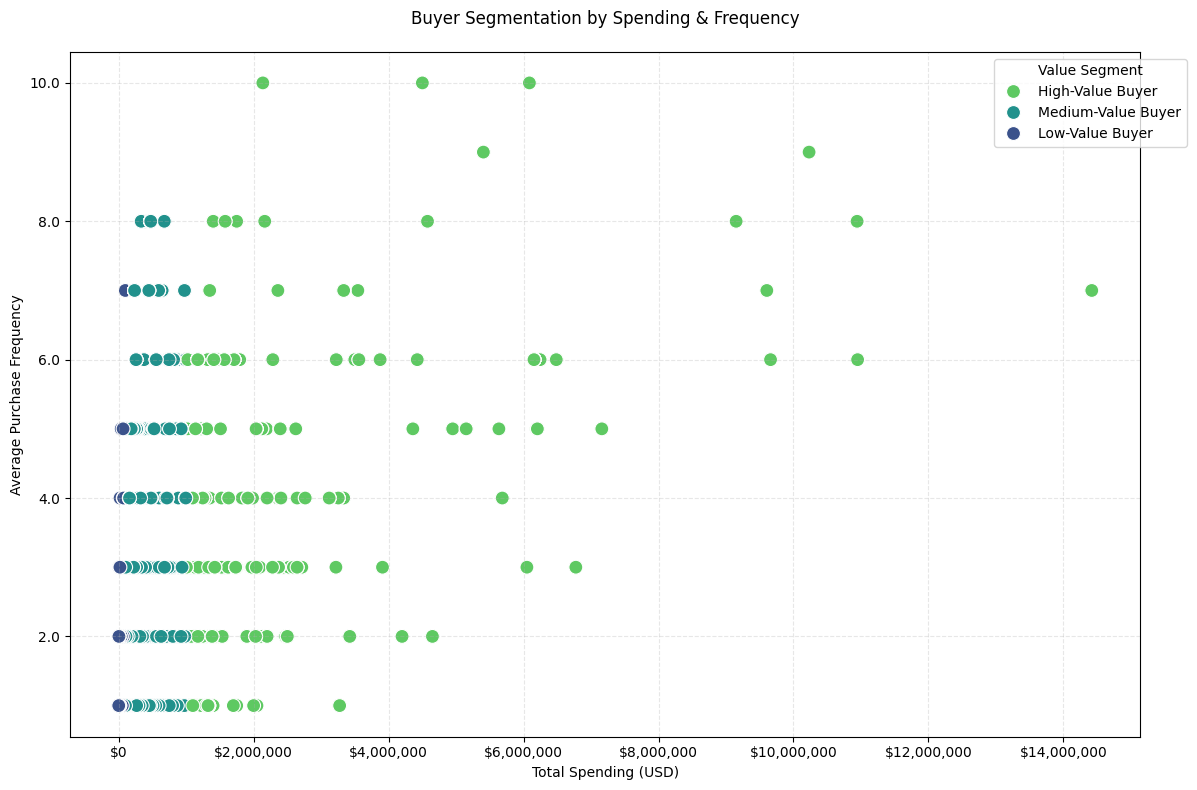

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker  # Required for formatting

# Manually define a reversed viridis color list
reversed_palette = sns.color_palette("viridis", n_colors=3)[::-1]

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x='Total_Spending',
    y='avg_purchase_frequency',
    hue='CLV_category',
    data=sold_horses_df,
    palette=reversed_palette,  # Now it’s a proper list, not a colormap
    s=100
)

# Format x-axis as full dollar amounts with commas
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x:,.0f}'))

# Format y-axis to 1 decimal place
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

plt.title('Buyer Segmentation by Spending & Frequency', pad=20)
plt.xlabel('Total Spending (USD)')
plt.ylabel('Average Purchase Frequency')
plt.legend(title="Value Segment", bbox_to_anchor=(1.05, 1))
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


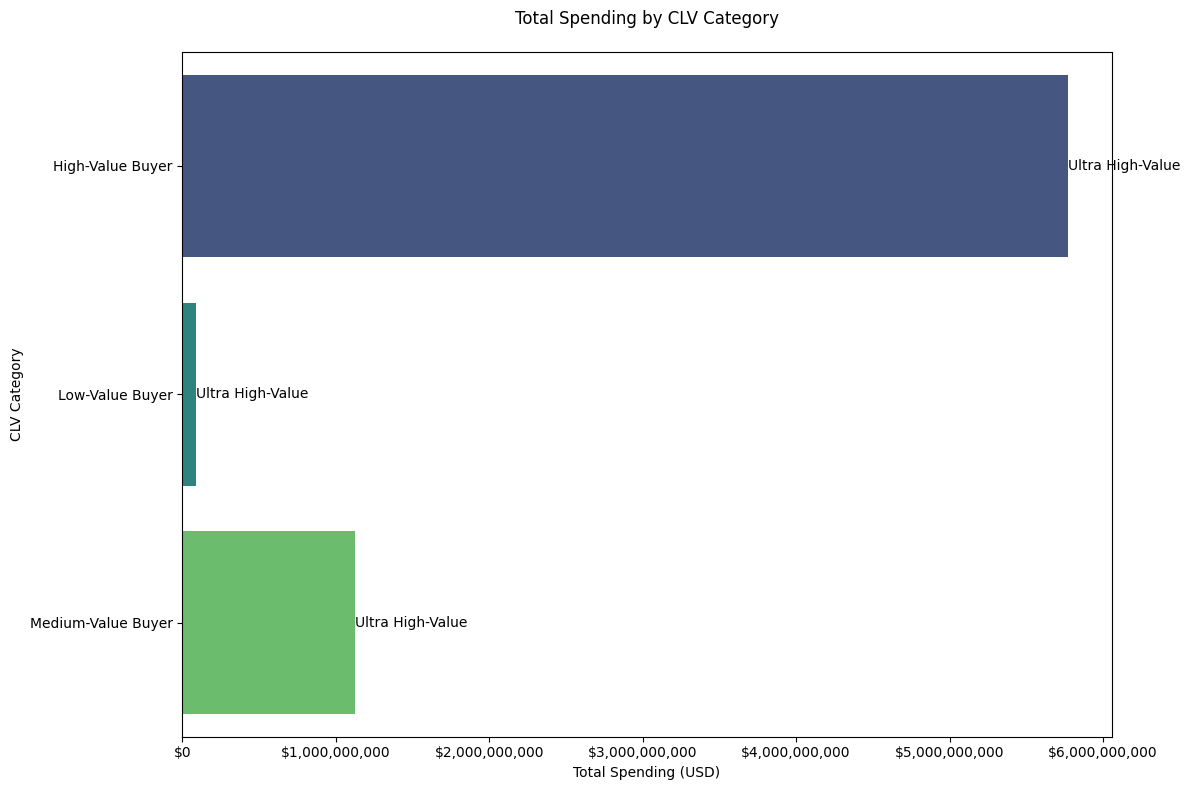

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Prepare the data
# Grouping by the CLV category and summing the total spending for each category
clv_segment_performance = sold_horses_df.groupby('CLV_category').agg(
    total_spend=('Total_Spending', 'sum')
).reset_index()

# Create a bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='total_spend',
    y='CLV_category',
    data=clv_segment_performance,
    palette='viridis'
)

# Add range labels for better clarity (these ranges are just examples)
for index, row in clv_segment_performance.iterrows():
    if row['total_spend'] > 10000000:
        label = "Ultra High-Value"
    elif row['total_spend'] > 1000000:
        label = "High-Value"
    elif row['total_spend'] > 100000:
        label = "Medium-Value"
    else:
        label = "Low-Value"

    ax.text(row['total_spend'] + 500000, index, f'{label}', color='black', ha='left', va='center')

# Format x-axis as full dollar amounts with commas
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x:,.0f}'))

# Set plot title and labels
plt.title('Total Spending by CLV Category', pad=20)
plt.xlabel('Total Spending (USD)')
plt.ylabel('CLV Category')

# Display the plot
plt.tight_layout()
plt.show()


#Targeted Marketing:
**Goal**: Based on the CLV and segmentation, create marketing strategies that target high-value and low-value segments differently.
**Action**:
High-value buyers: Offer personalized, high-ticket items or loyalty perks.
Medium or low-value buyers: Introduce targeted discounts or special offers to encourage higher spending.

In [ ]:
# Example: Targeting high-value buyers with personalized offers
high_value_buyers = sold_horses_df[sold_horses_df['CLV_category'] == 'High-Value Buyer']
for buyer in high_value_buyers['purchaser']:
    # Send personalized email or special offer
    pass


In [ ]:
# Function to categorize buyers based on their dynamic spending
def dynamic_segment(buyer):
    if buyer['Total_Spending'] > 10000000:  # Ultra High-Value Buyers
        return 'Ultra High-Value Buyer'
    elif 1000000 < buyer['Total_Spending'] <= 10000000:  # High-Value Buyers
        return 'High-Value Buyer'
    elif 100000 <= buyer['Total_Spending'] <= 1000000:  # Medium-Value Buyers
        return 'Medium-Value Buyer'
    else:  # Low-Value Buyers
        return 'Low-Value Buyer'

# Ensure that the 'Total_Spending' column exists
if 'Total_Spending' in sold_horses_df.columns:
    # Apply the function to each buyer
    sold_horses_df['Dynamic_CLV_category'] = sold_horses_df.apply(dynamic_segment, axis=1)

    # Display the updated segment with dynamic categories
    print(sold_horses_df[['purchaser', 'Total_Spending', 'Dynamic_CLV_category']])
else:
    print("The 'Total_Spending' column is missing from the data.")


                                   purchaser  Total_Spending  \
0                 Bradley Thoroughbreds  LLC   $1,400,000.00   
1                           Epic Horses, LLC   $3,220,000.00   
2     CHC INC., Maverick Racing & Siena Farm   $4,950,000.00   
3                        Resolute Bloodstock   $2,100,000.00   
4                              Shadwell Farm   $4,650,000.00   
...                                      ...             ...   
6411                       Carly Fleischmann      $38,000.00   
6412                      William J. Pribble       $2,000.00   
6413                      William J. Pribble       $2,000.00   
6414                           William Nicks       $5,000.00   
6415                            Big Oak Farm      $66,000.00   

     Dynamic_CLV_category  
0        High-Value Buyer  
1        High-Value Buyer  
2        High-Value Buyer  
3        High-Value Buyer  
4        High-Value Buyer  
...                   ...  
6411      Low-Value Buyer  
6412   